In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import stitch
import utils
import features

In [36]:
def convertResult(img):
    '''Because of your images which were loaded by opencv, 
    in order to display the correct output with matplotlib, 
    you need to reduce the range of your floating point image from [0,255] to [0,1] 
    and converting the image from BGR to RGB:'''
    img = np.array(img,dtype=float)/float(255)
    img = img[:,:,::-1]
    return img
    

In [37]:
#load images
list_images=utils.loadImages('data/myhouse',resize=0)

In [38]:
# Using opencv's sift implementation here

sift = cv2.SIFT_create()

def computeSIFT(image):
    return sift.detectAndCompute(image, None)

In [39]:
# img =cv2.imread(imageList[j],0)
k0,f0 = computeSIFT(list_images[0])
k1,f1 = computeSIFT(list_images[1])
  

In [40]:
import cv2

sift = cv2.SIFT_create()


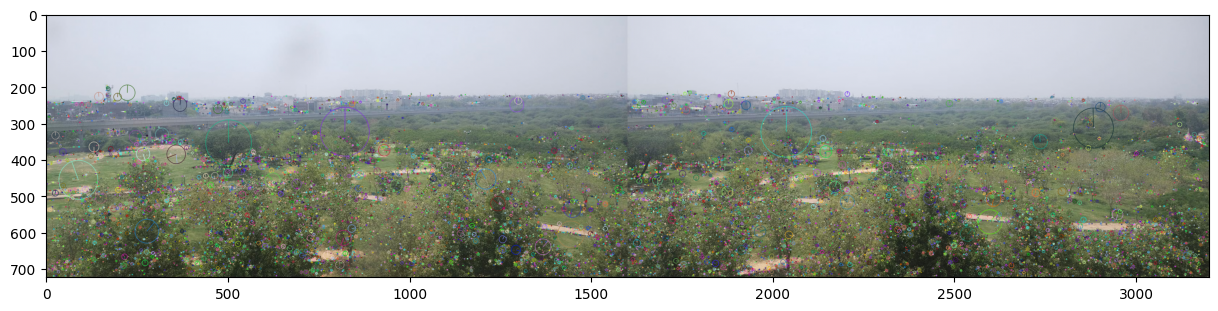

In [41]:
#draw keypoints
img0_kp=features.drawKeypoints(list_images[0].copy(),k0)
img1_kp=features.drawKeypoints(list_images[1].copy(),k1)

plt_img = np.concatenate((img0_kp, img1_kp), axis=1)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(plt_img))

In [42]:
#matching features using BruteForce 
mat=features.matchFeatures(f0,f1,ratio=0.6,opt='BF')

In [43]:
#Computing Homography matrix and mask
H,matMask=features.generateHomography(list_images[0],list_images[1])

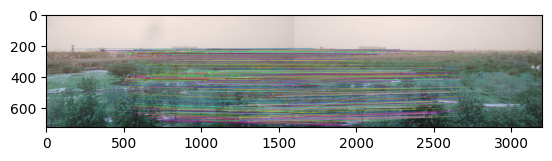

<Figure size 2500x1500 with 0 Axes>

<Figure size 2500x1500 with 0 Axes>

In [44]:
#draw matches


bf = cv2.BFMatcher()
matches = bf.knnMatch(f0, f1, k=2)
    # Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append(m)


img3 = cv2.drawMatches(list_images[0], k0, list_images[1], k1, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3), plt.show()
plt.figure(figsize=(25,15))

    
    
# img=features.drawMatches(list_images[0],k0,list_images[1],k1,None)
# plt.figure(figsize=(15,15))
# plt.imshow(convertResult(img))

In [45]:
#wrap 2 image
#choose list_images[0] as desination
pano,non_blend,left_side,right_side=stitch.warpTwoImages(list_images[1],list_images[0],True)

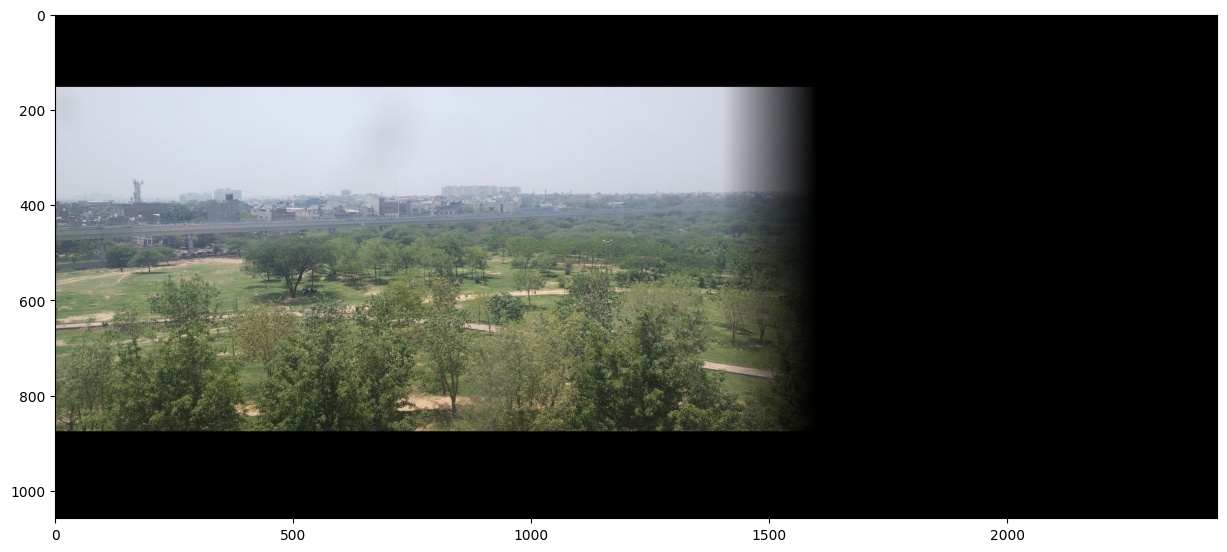

In [46]:
#display the leftside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(left_side))

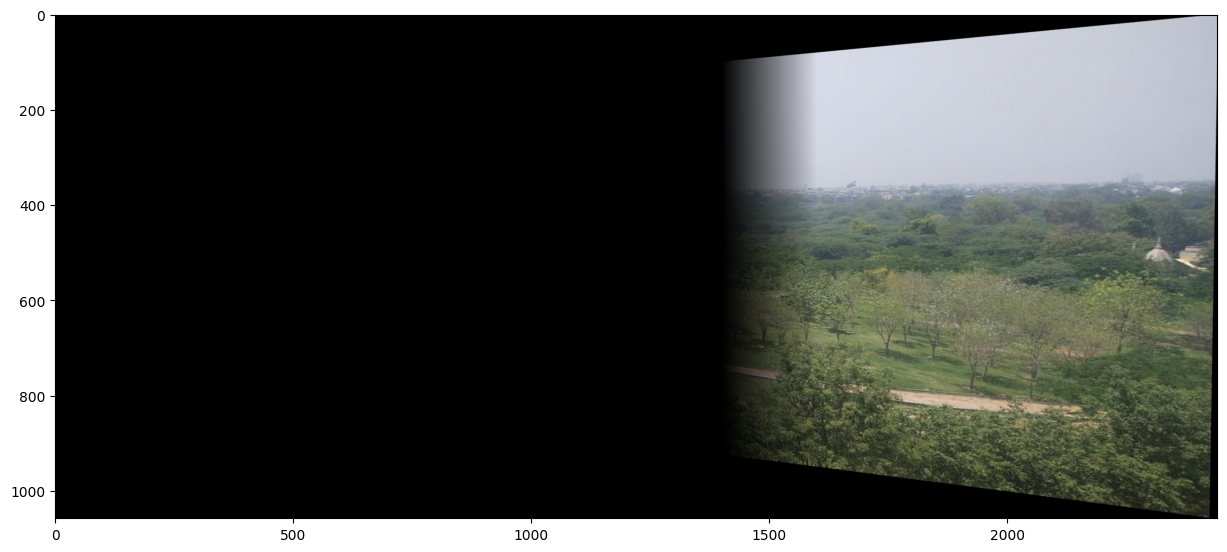

In [47]:
#display the rightside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(right_side))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


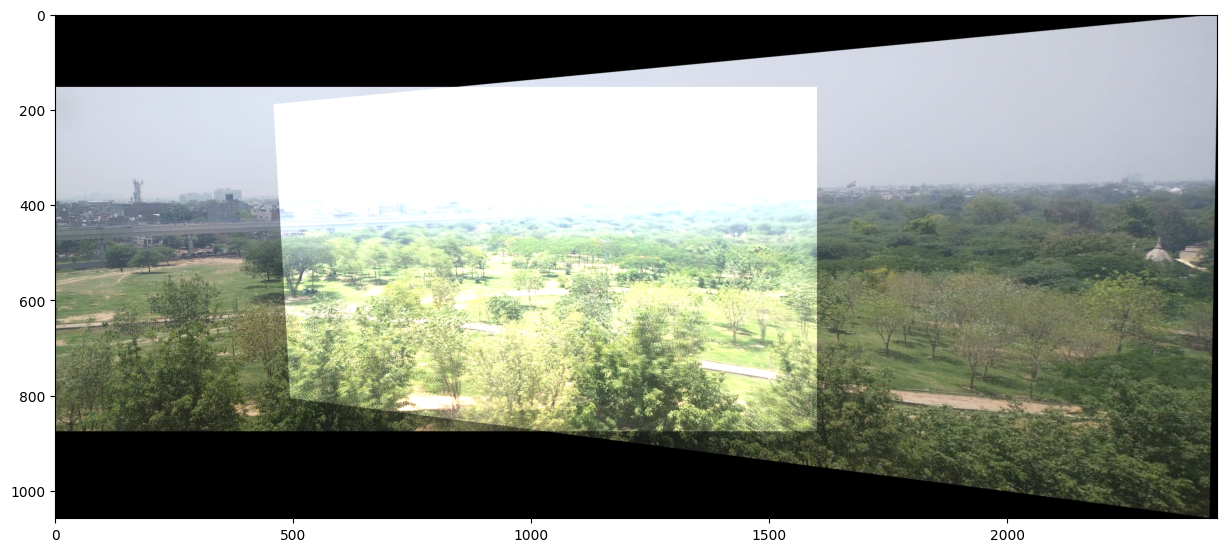

In [48]:
#display pano without cropping and blending
plt.figure(figsize=(15,15))
plt.imshow(convertResult(non_blend))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


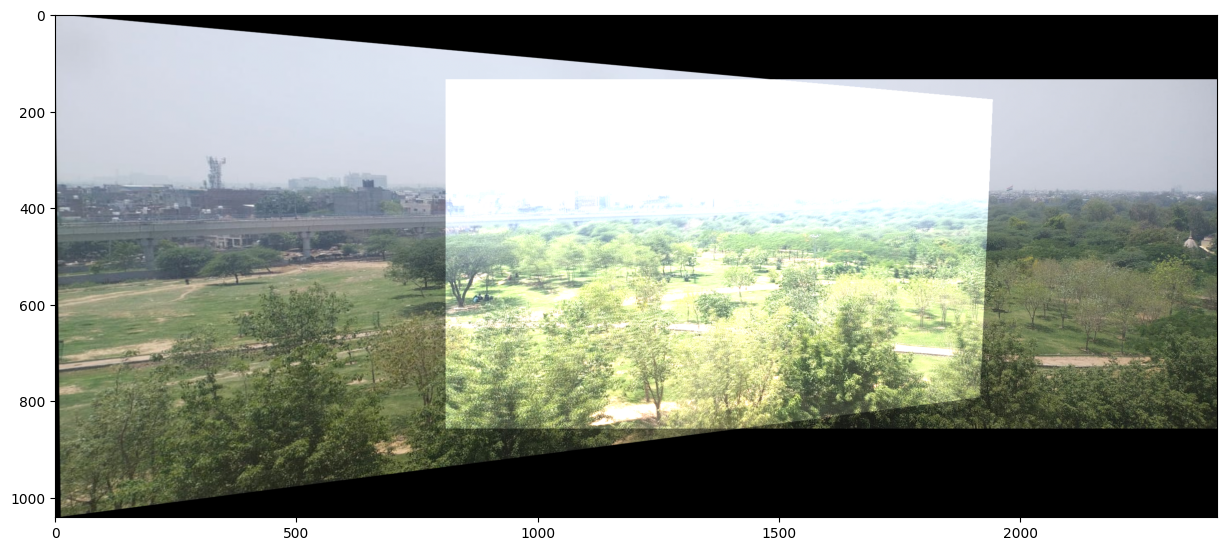

In [49]:
#if you choose list_images[1] as desination, the output look like this
_,non_blend2,_,_=stitch.warpTwoImages(list_images[0],list_images[1],True)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(non_blend2))

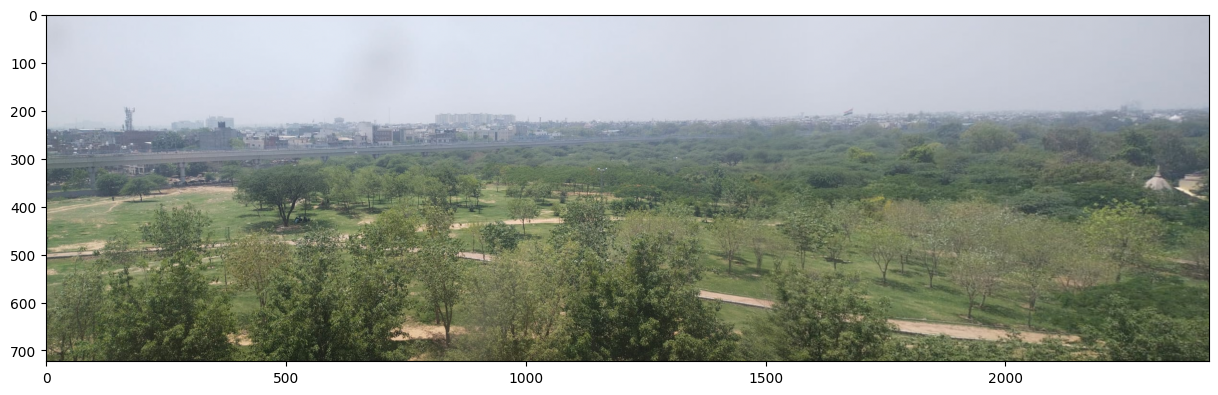

In [50]:
#pano after cropping and blending
plt.figure(figsize=(15,15))
plt.imshow(convertResult(pano))

In [51]:
import utils
list_images=utils.loadImages('data/myhouse',resize=0)
panorama=stitch.multiStitching(list_images)
plt.figure(figsize=(20,20))
plt.imshow(convertResult(panorama))

Exception: Please try again with another image set!